In [1]:
import pandas as pd
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import operator
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
import keras
from itertools import chain
import itertools
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve

Using TensorFlow backend.


In [2]:
seed_value= 42

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
file_name = 'r224n09.gzip'
file_name.strip('data_new/').strip('.gzip')

#general_variables
timestep = 20

#train on normal?
train_on_normal = False

data = pd.read_parquet(file_name)
data.reset_index(drop=True, inplace = True)
names = list(data)

In [4]:
data[data['New_label']>0].shape

(201, 463)

In [5]:
data

,timestamp,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,...,avg:swap_free,var:swap_free,max:swap_free,min:swap_free,avg:swap_total,var:swap_total,max:swap_total,min:swap_total,label,New_label
0,2020-06-01 00:00:00,14.500000,0.011429,14.6,14.4,24.000000,0.000000,24,24,24.000000,...,3146432.0,0.0,3146432,3146432,4194240,0.0,4194240,4194240,0,0
1,2020-06-01 00:15:00,14.573333,0.010667,14.8,14.4,24.000000,0.000000,24,24,24.000000,...,3146432.0,0.0,3146432,3146432,4194240,0.0,4194240,4194240,0,0
2,2020-06-01 00:30:00,14.586667,0.019810,14.8,14.4,24.000000,0.000000,24,24,24.000000,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
3,2020-06-01 00:45:00,14.426667,0.004952,14.6,14.4,24.000000,0.000000,24,24,23.066667,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
4,2020-06-01 01:00:00,14.440000,0.012571,14.6,14.2,24.000000,0.000000,24,24,23.133333,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
5,2020-06-01 01:15:00,14.333333,0.009524,14.4,14.2,24.000000,0.000000,24,24,23.000000,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
6,2020-06-01 01:30:00,14.440000,0.006857,14.6,14.4,24.000000,0.000000,24,24,23.000000,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
7,2020-06-01 01:45:00,14.271429,0.009890,14.4,14.2,24.000000,0.000000,24,24,23.000000,...,3146560.0,0.0,3146560,3146560,4194240,0.0,4194240,4194240,0,0
8,2020-06-01 02:00:00,14.200000,0.006154,14.4,14.0,24.000000,0.000000,24,24,23.000000,...,3146624.0,0.0,3146624,3146624,4194240,0.0,4194240,4194240,0,0
9,2020-06-01 02:15:00,14.213333,0.002667,14.4,14.2,24.000000,0.000000,24,24,23.000000,...,3146624.0,0.0,3146624,3146624,4194240,0.0,4194240,4194240,0,0


In [6]:
data = data[:int(data.shape[0]*1)]
test = data[int(data.shape[0]*0):]
test.shape

(13277, 463)

In [7]:
#FIT scaler on train data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
scaler = scaler.fit(data.drop('timestamp', axis = 1).values)


In [8]:
if train_on_normal:
    data = data[data.New_label == 0]
    #normalized = scaler.transform(data.drop('timestamp', axis = 1).values)
    print(data.shape)
else:
    #normalized = scaler.transform(data.drop('timestamp', axis = 1).values)
    print(data.shape)

(13277, 463)


In [9]:
diffs = dict(data['timestamp'].diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64'))
large_diffs = {i:diffs[i] for i in diffs.keys() if diffs[i] > 15}

diffs_test = dict(test['timestamp'].diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64'))
large_diffs_test = {i:diffs_test[i] for i in diffs_test.keys() if diffs_test[i] > 15}

lk = list(large_diffs.keys())
lk.sort()
lk_test = list(large_diffs_test.keys())
lk_test.sort()

l_mod = [0] + lk + [data.shape[0] +1]
l_mod_test = [0] + lk_test + [test.shape[0] +1]

list_of_dfs = [data.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]
list_of_dfs = [i for i in list_of_dfs if i.shape[0] > timestep]

list_of_dfs_test = [test.iloc[l_mod_test[n]:l_mod_test[n+1]] for n in range(len(l_mod_test)-1)]
list_of_dfs_test = [i for i in list_of_dfs_test if i.shape[0] > timestep]

lenghts = {i:list_of_dfs[i].shape[0] for i in range(len(list_of_dfs))}
lenghts_test = {i:list_of_dfs_test[i].shape[0] for i in range(len(list_of_dfs_test))}

In [10]:
n_train = sum([i.shape[0] for i in list_of_dfs])
n_test = sum([i.shape[0] for i in list_of_dfs_test])
print(n_train, n_test)

11568 11568


In [11]:
data_gens = []
for df in list_of_dfs:
    normalized = scaler.transform(df.drop('timestamp', axis = 1).values)
    data_gens.append(TimeseriesGenerator(normalized, normalized,
                               length=timestep, sampling_rate=1,
                               batch_size=1000))


data_gens_test = []
for df in list_of_dfs_test:
    normalized = scaler.transform(df.drop('timestamp', axis = 1).values)
    data_gens_test.append(TimeseriesGenerator(normalized, normalized,
                               length=timestep, sampling_rate=1,
                               batch_size=1000))    

In [12]:
dg_train = itertools.chain.from_iterable(data_gens)
dg_test = itertools.chain.from_iterable(data_gens_test)

train = pd.concat(list_of_dfs)
test = pd.concat(list_of_dfs_test)

train_X = scaler.transform(train.drop('timestamp', axis = 1).values)

In [13]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1],))
    L1 = Dense(16, activation = 'selu')(inputs)
    L3 = Dense(8, activation = 'selu')(L1)
    L4 = Dense(16, activation = 'selu')(L3)
    #L5 = Dense(, activation = 'selu')(L4)
    output = Dense(X.shape[1])(L4)
    model = Model(inputs = inputs, outputs = output)
    return model

In [14]:
model = autoencoder_model(train_X)
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.MeanSquaredError())
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 462)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                7408      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 462)               7854      
Total params: 15,542
Trainable params: 15,542
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(train_X,train_X,  epochs = 30)

Epoch 1/30
11568/11568 [==============================] - 1s 124us/step - loss: 0.0180
Epoch 2/30
11568/11568 [==============================] - 1s 96us/step - loss: 0.0067
Epoch 3/30
11568/11568 [==============================] - 1s 97us/step - loss: 0.0052
Epoch 4/30
11568/11568 [==============================] - 1s 98us/step - loss: 0.0046
Epoch 5/30
11568/11568 [==============================] - 1s 98us/step - loss: 0.0041
Epoch 6/30
11568/11568 [==============================] - 1s 97us/step - loss: 0.0038
Epoch 7/30
11568/11568 [==============================] - 1s 99us/step - loss: 0.0036
Epoch 8/30
11568/11568 [==============================] - 1s 100us/step - loss: 0.0035
Epoch 9/30
11568/11568 [==============================] - 1s 95us/step - loss: 0.0034
Epoch 10/30
11568/11568 [==============================] - 1s 95us/step - loss: 0.0034
Epoch 11/30
11568/11568 [==============================] - 1s 95us/step - loss: 0.0033
Epoch 12/30
11568/11568 [=========================

In [16]:
val_test = scaler.transform(test.drop('timestamp', axis = 1).values)

predictions = model.predict(val_test)

predicted = scaler.inverse_transform(predictions)

diff_normal = val_test - predictions

normal_diff = pd.DataFrame(diff_normal, columns=names[1:])

normal_diff['Total absolute reproduction error'] = normal_diff.abs().sum(axis=1)

normal_diff['real_label'] = test['New_label'].values
normal_diff['timestamp'] = test['timestamp'].values

normal_diff['simple_label'] = normal_diff['real_label'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
normal_diff['Softmax'] = normal_diff['Total absolute reproduction error'].apply(lambda x: x/max(normal_diff['Total absolute reproduction error']))
normal_diff[normal_diff['real_label'] != 0.0].shape

(163, 467)

In [18]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
auc = roc_auc_score(normal_diff['simple_label'], normal_diff['Softmax'])

print(auc)

0.5426223026710382


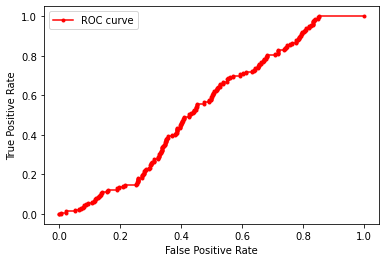

In [19]:
lr_fpr, lr_tpr, _ = roc_curve(normal_diff['simple_label'], normal_diff['Softmax'])
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC curve', color = 'r')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()